<a href="https://colab.research.google.com/github/MarwanAhmed20/Time-Series-with-LSTM/blob/main/Time_series_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
import yfinance as yf
stock_symbol = ['AAPL','MSFT','AMZN','FDX','WMT']  # Example: Apple Inc.

# Get the data
df = yf.download(stock_symbol, start='2021-01-01', end='2024-01-01')

[*********************100%%**********************]  5 of 5 completed


In [ ]:
df.head()

Price        Adj Close                               Close              \
Ticker            AAPL        AMZN        MSFT        AAPL        AMZN   
Date                                                                     
2021-01-04  127.002106  159.331497  211.605301  129.410004  159.331497   
2021-01-05  128.572327  160.925507  211.809464  131.009995  160.925507   
2021-01-06  124.244392  156.919006  206.317368  126.599998  156.919006   
2021-01-07  128.484009  158.108002  212.188507  130.919998  158.108002   
2021-01-08  129.592972  159.134995  213.481354  132.050003  159.134995   

Price                         High                                 Low  \
Ticker            MSFT        AAPL        AMZN        MSFT        AAPL   
Date                                                                     
2021-01-04  217.690002  133.610001  163.600006  223.000000  126.760002   
2021-01-05  217.899994  131.740005  161.169006  218.520004  128.429993   
2021-01-06  212.250000  131.050003  159.875504  216.490005  126.379997   
2021-01-07  218.289993  131.630005  160.427002  219.339996  127.860001   
2021-01-08  219.619995  132.630005  159.531998  220.580002  130.229996   

Price                                     Open                          \
Ticker            AMZN        MSFT        AAPL        AMZN        MSFT   
Date                                                                     
2021-01-04  157.201004  214.809998  133.520004  163.500000  222.529999   
2021-01-05  158.253006  215.699997  128.889999  158.300507  217.259995   
2021-01-06  156.557999  211.940002  127.720001  157.324005  212.169998   
2021-01-07  157.750000  213.710007  128.360001  157.850006  214.039993   
2021-01-08  157.110001  217.029999  132.429993  159.000000  218.679993   

Price          Volume                      
Ticker           AAPL      AMZN      MSFT  
Date                                       
2021-01-04  143301900  88228000  37130100  
2021-01-05   97664900  53110000  23823000  
2021-01-06  155088000  87896000  35930700  
2021-01-07  109578200  70290000  27694500  
2021-01-08  105158200  70754000  22956200

In [ ]:
df_close = df['Close']
df_app = df_close['AAPL']
df_amazon = df_close['AMZN']
df_FDX = df_close['FDX']
df_Mic = df_close['MSFT']
df_wmt = df_close['WMT']

In [ ]:
df_app.head()

Date
2021-01-04    129.410004
2021-01-05    131.009995
2021-01-06    126.599998
2021-01-07    130.919998
2021-01-08    132.050003
Name: AAPL, dtype: float64

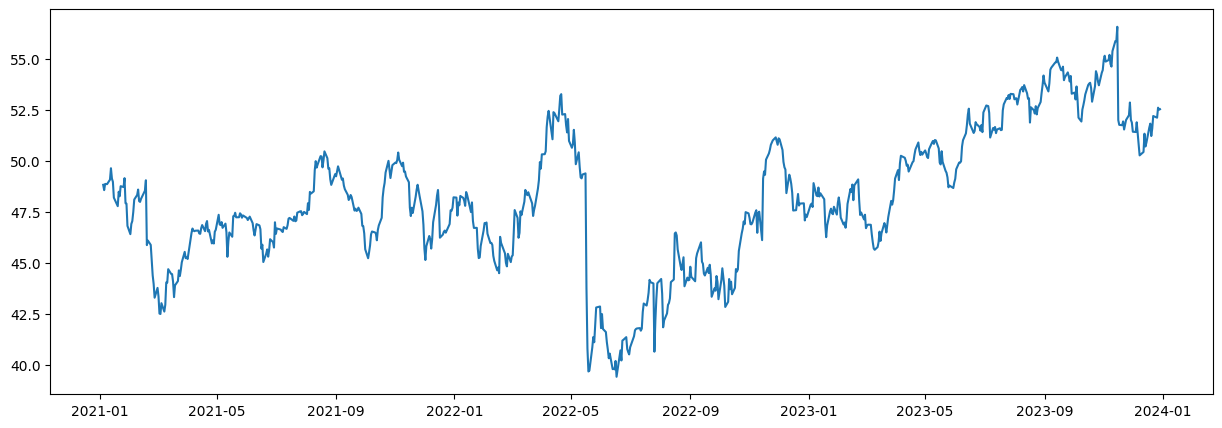

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df_wmt)

In [ ]:
from statsmodels.tsa.stattools import adfuller

data = df_wmt
# Load time series data
# Assume 'data' is a pandas Series or DataFrame with a 'value' column
# Example: data = pd.read_csv('your_data.csv')['value']

# Perform ADF test
result = adfuller(data)

# Extract results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Print results
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpret the results
if p_value < 0.05:
    print('Reject the null hypothesis: The time series is stationary.')
else:
    print('Fail to reject the null hypothesis: The time series may be non-stationary.')

ADF Statistic: -2.472814329685775
p-value: 0.12222977297596038
Critical Values:
   1%: -3.4390874066174355
   5%: -2.8653962034740705
   10%: -2.568823449196012
Fail to reject the null hypothesis: The time series may be non-stationary.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
# Split data into training and testing sets
train_size = int(len(df_wmt) * 0.8)
train, test = df_wmt.iloc[:train_size], df_wmt.iloc[train_size:]


In [ ]:
# Fit ARIMA model
# Example values for p, d, and q - replace with appropriate values
p, d, q = 2, 1, 2
model = ARIMA(train, order=(p, d, q))
arima_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



RMSE: 3.81415954511057


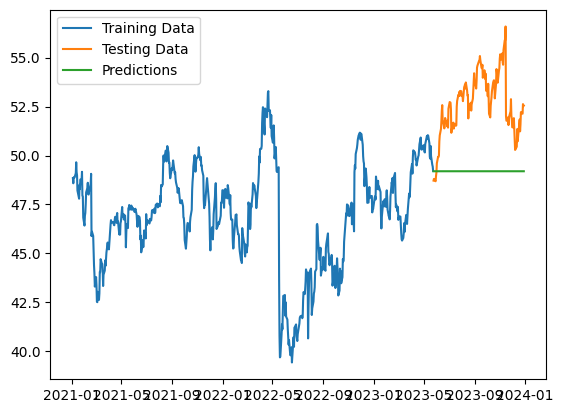

In [ ]:
# Validate model
predictions = arima_model.forecast(steps=len(test))
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# Plot results
plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data')
plt.plot(test.index, predictions, label='Predictions')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
P, D, Q, s = 1, 1, 1, 12
sarima_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



RMSE: 3.915361147740607


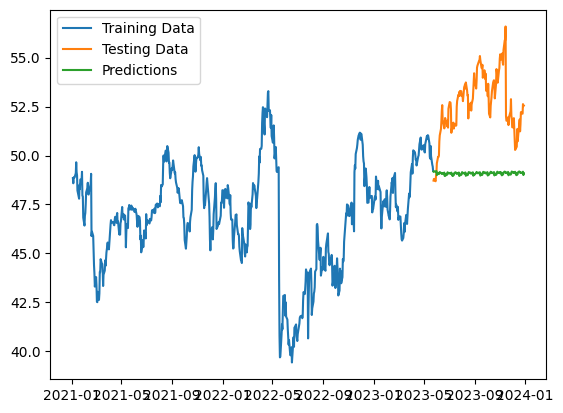

In [ ]:
# Validate model
predictions = sarima_result.forecast(steps=len(test))
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# Plot results
plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data')
plt.plot(test.index, predictions, label='Predictions')
plt.legend()
plt.show()

In [ ]:
data = df_wmt.values.reshape(-1, 1)

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define sequence length (number of time steps to look back)
sequence_length = 10

# Function to create sequences for LSTM input
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets (80-20 split)
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
19/19 [==============================] - 3s 13ms/step - loss: 0.1500
Epoch 2/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0190
Epoch 3/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0069
Epoch 4/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0055
Epoch 5/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0048
Epoch 6/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0045
Epoch 7/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0043
Epoch 8/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0041
Epoch 9/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0041
Epoch 10/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0040
Epoch 11/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0040
Epoch 12/100
19/19 [==============================] - 0s 16ms/step - loss: 0.0037
Epoch 13/100
19/19 [=====

Train Loss: 0.0014354748418554664
Test Loss: 0.001571420463733375
5/5 [==============================] - 0s 4ms/step


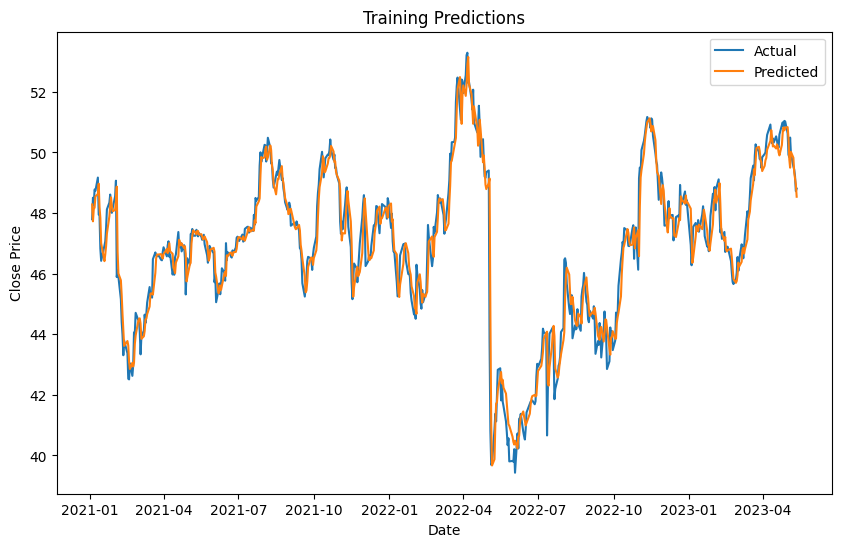

In [ ]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print('Train Loss:', train_loss)
print('Test Loss:', test_loss)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invert scaling for predictions
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Plot training predictions
plt.figure(figsize=(10, 6))
plt.plot(df_wmt.index[:len(train_predictions)], y_train, label='Actual')
plt.plot(df_wmt.index[:len(train_predictions)], train_predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Training Predictions')
plt.legend()
plt.show()



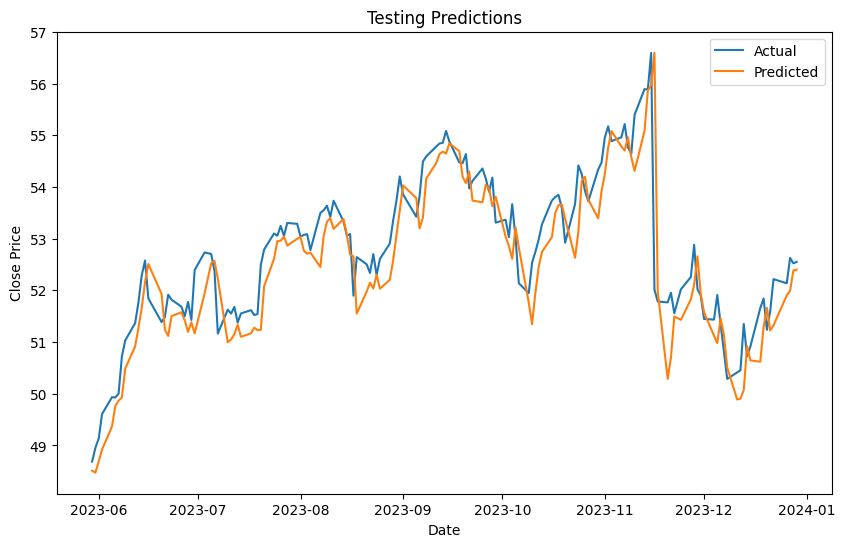

In [ ]:
# Plot testing predictions
plt.figure(figsize=(10, 6))
test_index = df_wmt.index[split + sequence_length:]
plt.plot(test_index, y_test, label='Actual')
plt.plot(test_index, test_predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Testing Predictions')
plt.legend()
plt.show()